## **I. Import Libraries Necessary**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import string
import demoji
from pyvi import ViPosTagger, ViTokenizer
import scipy
from wordcloud import WordCloud, STOPWORDS
import re
import helpers.xuly_tiengviet as xt
from helpers.text_cleaner import simple_text_clean
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## **II. Restaurant Dataset**

### 1. Read dataset and check summary about data

In [3]:
restaurants = pd.read_csv('data_raw/restaurant.csv')

In [4]:
restaurants.head()

,Unnamed: 0,RestaurantID,Restaurant Name,Address,Time,Price
0,0,1,Bún Bò Đất Thánh - Shop Online,"221/16 Đất Thánh, P. 6, Tân Bình, TP. HCM",NaN,15.000 - 50.000
1,1,2,Bánh Mì Bảy Hổ - Phan Ngữ,"12 Phan Ngữ, P. Đa Kao, Quận 1, TP. HCM",06:00 - 20:00,10.000 - 30.000
2,2,3,Chân Gà Sốt Thái - Mr.Bon - Lê Bình,"100 Lê Bình, P. 4, Tân Bình, TP. HCM",06:00 - 23:00,10.000 - 100.000
3,3,4,Yumi Fruit - Trái Cây Sạch & Đồ Ăn Vặt - Shop Online - Lê Thị Bạch Cát,"150/19 Lê Thị Bạch Cát, P. 11, Quận 11, TP. HCM",00:00 - 23:59,20.000 - 100.000
4,4,5,Sinh Tố Tao Đàn - The Sun Avenue,"The Sun Avenue, Block SAV.06 - 00.01, 28 Mai Chí Thọ, P. An Phú, Thành Phố Thủ Đức, TP. HCM",07:30 - 21:30,15.000 - 80.000


In [5]:
restaurants.tail()

,Unnamed: 0,RestaurantID,Restaurant Name,Address,Time,Price
3642,359,3279,Gỏi Cá Trích Hoàng Anh - Lê Hoàng Phái,"79/35/1 Lê Hoàng Phái, P. 17, Gò Vấp, TP. HCM",NaN,0 - 0
3643,360,3280,River View Restaurant,"8/11 Đường Số 49B, P. Thảo Điền, Thành Phố Thủ Đức, TP. HCM",10:00 - 23:30,50.000 - 100.000
3644,361,3281,Bánh Trứng CHEF EGGLET Gà Non HongKong,"6 Nguyễn Thượng Hiền, P. 5, Quận 3, TP. HCM",NaN,30.000 - 50.000
3645,362,3282,Trà Sữa Hai Cô Gái - Bình Quới,"211 Bình Quới, P. 28, Bình Thạnh, TP. HCM",NaN,0 - 0
3646,363,3283,Bún Bò Huế O Hoa - Nguyễn Thị Nhỏ,"189 Nguyễn Thị Nhỏ, P. 16, Quận 11, TP. HCM",NaN,30.000 - 45.000


In [6]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3647 non-null   int64 
 1   RestaurantID     3647 non-null   int64 
 2   Restaurant Name  3615 non-null   object
 3   Address          3615 non-null   object
 4   Time             2214 non-null   object
 5   Price            3615 non-null   object
dtypes: int64(2), object(4)
memory usage: 171.1+ KB


### 2. Data Cleaning

In [7]:
# Check duplicate 
restaurants.duplicated().sum()

0

In [8]:
restaurants['RestaurantID'].duplicated().sum()

0

In [9]:
restaurants = restaurants.dropna(subset= 'Restaurant Name')
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3615 entries, 0 to 3646
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3615 non-null   int64 
 1   RestaurantID     3615 non-null   int64 
 2   Restaurant Name  3615 non-null   object
 3   Address          3615 non-null   object
 4   Time             2214 non-null   object
 5   Price            3615 non-null   object
dtypes: int64(2), object(4)
memory usage: 197.7+ KB


In [10]:
restaurants['District'] = restaurants['Address'].str.split(', ').apply(lambda x: x[-2] if len(x) > 1 else None)
restaurants.head()

,Unnamed: 0,RestaurantID,Restaurant Name,Address,Time,Price,District
0,0,1,Bún Bò Đất Thánh - Shop Online,"221/16 Đất Thánh, P. 6, Tân Bình, TP. HCM",NaN,15.000 - 50.000,Tân Bình
1,1,2,Bánh Mì Bảy Hổ - Phan Ngữ,"12 Phan Ngữ, P. Đa Kao, Quận 1, TP. HCM",06:00 - 20:00,10.000 - 30.000,Quận 1
2,2,3,Chân Gà Sốt Thái - Mr.Bon - Lê Bình,"100 Lê Bình, P. 4, Tân Bình, TP. HCM",06:00 - 23:00,10.000 - 100.000,Tân Bình
3,3,4,Yumi Fruit - Trái Cây Sạch & Đồ Ăn Vặt - Shop Online - Lê Thị Bạch Cát,"150/19 Lê Thị Bạch Cát, P. 11, Quận 11, TP. HCM",00:00 - 23:59,20.000 - 100.000,Quận 11
4,4,5,Sinh Tố Tao Đàn - The Sun Avenue,"The Sun Avenue, Block SAV.06 - 00.01, 28 Mai Chí Thọ, P. An Phú, Thành Phố Thủ Đức, TP. HCM",07:30 - 21:30,15.000 - 80.000,Thành Phố Thủ Đức


In [11]:
restaurants['District'].value_counts()

Thành Phố Thủ Đức    439
Bình Thạnh           419
Gò Vấp               398
Tân Bình             289
Tân Phú              259
Quận 7               221
Quận 1               203
Bình Tân             203
Quận 3               191
Quận 10              171
Phú Nhuận            147
Quận 12              126
Quận 8               115
Quận 4                93
Quận 11               92
Quận 6                75
Quận 5                73
Hóc Môn               48
Bình Chánh            30
Nhà Bè                23
Name: District, dtype: int64

In [12]:
restaurants = restaurants.drop(columns= {'Unnamed: 0'})
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3615 entries, 0 to 3646
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RestaurantID     3615 non-null   int64 
 1   Restaurant Name  3615 non-null   object
 2   Address          3615 non-null   object
 3   Time             2214 non-null   object
 4   Price            3615 non-null   object
 5   District         3615 non-null   object
dtypes: int64(1), object(5)
memory usage: 197.7+ KB


`Comment:`
- Overall, the dataset consists of 6 columns: RestaurantID, Restaurant Name, Address, Time, Price, and District with a total of 3615 unique records.  
- Data is missing for the Time column for nearly 40% of the records, while the rest of the data is complete.  
- Here are some data preprocessing suggestions for this dataset:  
    - `Restaurant:`  
        - For the time being, we will keep the restaurant name as is, as it may contain unique words or phrases that identify the restaurant. Categorizing these as special characters, invalid words, or foreign languages would be inappropriate and could lead to the loss of the restaurant's uniqueness.  
    - `Address:`  
        - Similarly, we will keep the detailed address of each restaurant as is, as some street names may not be in Vietnamese.  
    - `Time:`  
        - Extract the time data into two separate columns, Open and Close. Analyze the distribution of these two new variables to determine the most common opening and closing times for restaurants. Use these values to fill in the missing values in the Time data column.  
    - `Price:`  
        - Similar to the time data, we will split this variable into two columns, Lowest and Highest, for further analysis.

`Time`

In [13]:
# Create a new DataFrame df_new with two variables, RestaurantID and Time, where the Time variable does not contain any missing values.
time = restaurants[['RestaurantID', 'Time']].dropna()
time.head()

,RestaurantID,Time
1,2,06:00 - 20:00
2,3,06:00 - 23:00
3,4,00:00 - 23:59
4,5,07:30 - 21:30
5,6,07:30 - 21:15


In [14]:
# Count the unique values of Time for detailed analysis.
time['Time'].value_counts()

00:00 - 23:59                                    323
07:00 - 22:00                                     55
06:00 - 22:00                                     43
09:00 - 22:00                                     41
10:00 - 22:00                                     41
08:00 - 22:00                                     41
08:00 - 21:00                                     40
09:00 - 21:00                                     37
07:00 - 21:00                                     32
10:00 - 21:00                                     30
06:00 - 21:00                                     29
06:00 - 23:00                                     25
09:00 - 23:00                                     25
09:00 - 23:59                                     24
10:00 - 23:59                                     23
08:00 - 23:00                                     22
06:00 - 23:59                                     21
09:00 - 21:30                                     21
10:00 - 21:30                                 

`Comment:`  
Some restaurants (a negligible number) have different opening and closing hours throughout the day (operate in shifts). Therefore, we will only consider the general convention that the opening time is the earliest opening time in the day and the closing time is the latest closing time in the day.

In [15]:
# Create a new column Open containing the opening times extracted from the Time column.
time['Open'] = time['Time'].apply(lambda x: x[:5])

# Create a new column Close containing the closing times extracted from the Time column.
time['Close'] = time['Time'].apply(lambda x: x[-5:])

In [16]:
time.head()

,RestaurantID,Time,Open,Close
1,2,06:00 - 20:00,06:00,20:00
2,3,06:00 - 23:00,06:00,23:00
3,4,00:00 - 23:59,00:00,23:59
4,5,07:30 - 21:30,07:30,21:30
5,6,07:30 - 21:15,07:30,21:15


In [17]:
print('Opening hours of most restaurants:',time['Open'].mode()[0])
print('Closing hours of most restaurants:',time['Close'].mode()[0])

Opening hours of most restaurants: 00:00
Closing hours of most restaurants: 23:59


`Comment:`  
Therefore, we will replace the opening and closing times for restaurants with missing time data with 00:00 and 23:59, respectively.

In [18]:
# "Fill the NaN values in the restaurants df with the data extracted above.
restaurants['Time'] = restaurants['Time'].fillna('00:00 - 23:59')

In [19]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3615 entries, 0 to 3646
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RestaurantID     3615 non-null   int64 
 1   Restaurant Name  3615 non-null   object
 2   Address          3615 non-null   object
 3   Time             3615 non-null   object
 4   Price            3615 non-null   object
 5   District         3615 non-null   object
dtypes: int64(1), object(5)
memory usage: 197.7+ KB


In [20]:
# Create a new column named Time Open with the opening times extracted from the Time column.
restaurants['Time Open'] = restaurants['Time'].apply(lambda x: x[:5])

# Create a new column named Time Close with the closing times extracted from the Time column.
restaurants['Time Close'] = restaurants['Time'].apply(lambda x: x[-5:])

# restaurants = restaurants.drop('Time', axis= 1) 

restaurants.head()

,RestaurantID,Restaurant Name,Address,Time,Price,District,Time Open,Time Close
0,1,Bún Bò Đất Thánh - Shop Online,"221/16 Đất Thánh, P. 6, Tân Bình, TP. HCM",00:00 - 23:59,15.000 - 50.000,Tân Bình,00:00,23:59
1,2,Bánh Mì Bảy Hổ - Phan Ngữ,"12 Phan Ngữ, P. Đa Kao, Quận 1, TP. HCM",06:00 - 20:00,10.000 - 30.000,Quận 1,06:00,20:00
2,3,Chân Gà Sốt Thái - Mr.Bon - Lê Bình,"100 Lê Bình, P. 4, Tân Bình, TP. HCM",06:00 - 23:00,10.000 - 100.000,Tân Bình,06:00,23:00
3,4,Yumi Fruit - Trái Cây Sạch & Đồ Ăn Vặt - Shop Online - Lê Thị Bạch Cát,"150/19 Lê Thị Bạch Cát, P. 11, Quận 11, TP. HCM",00:00 - 23:59,20.000 - 100.000,Quận 11,00:00,23:59
4,5,Sinh Tố Tao Đàn - The Sun Avenue,"The Sun Avenue, Block SAV.06 - 00.01, 28 Mai Chí Thọ, P. An Phú, Thành Phố Thủ Đức, TP. HCM",07:30 - 21:30,15.000 - 80.000,Thành Phố Thủ Đức,07:30,21:30


- Data missing in the Time column has been processed.

`Price`

In [21]:
# Create a new column named Lowest Price with the lowest price of the dish in the restaurant, using the first data in the Price column.
restaurants['Lowest Price'] = restaurants['Price'].str.split(' - ').str[0]

# Create a new column named Highest Price with the highest price of the dish in the restaurant, using the last data in the Price column.
restaurants['Highest Price'] = restaurants['Price'].str.split(' - ').str[1]

restaurants.sample(5)

,RestaurantID,Restaurant Name,Address,Time,Price,District,Time Open,Time Close,Lowest Price,Highest Price
3292,2929,Gà Ủ Muối - 2/3F Tân Mỹ,"2/3F Tân Mỹ, P.Tân Thuận Tây, Quận 7, TP. HCM",00:00 - 02:59 | 09:00 - 23:59,0 - 0,Quận 7,00:00,23:59,0,0
740,377,Bánh Mì Chấm Hung Tubes - Nam Kỳ Khởi Nghĩa,"284 Đường Nam Kỳ Khởi Nghĩa, P. Võ Thị Sáu, Quận 3, TP. HCM",00:00 - 23:59,15.000 - 99.000,Quận 3,00:00,23:59,15.000,99.000
3229,2866,Ốc Bắc,"351 Nguyễn Thượng Hiền, P. 11, Quận 10, TP. HCM",11:30 - 21:30,60.000 - 90.000,Quận 10,11:30,21:30,60.000,90.000
3302,2939,Shake Tea - Trà Sữa & Ăn Vặt,"60 Phú Hữu, P. 14, Quận 5, TP. HCM",10:00 - 23:59,17.000 - 35.000,Quận 5,10:00,23:59,17.000,35.000
2358,1995,Tokbokki Nhà Tâm - Phan Chu Trinh,"93/2B Phan Chu Trinh, Ấp Tân Tiến, X. Xuân Thới Đông, Hóc Môn, TP. HCM",08:30 - 21:00,20.000 - 190.000,Hóc Môn,08:30,21:00,20.000,190.000


In [22]:
# Convert the data in the Lowest Price and Highest Price columns to numeric format.

restaurants['Lowest Price'] = restaurants['Lowest Price'].str.replace(".", "")
restaurants['Lowest Price'] = restaurants['Lowest Price'].astype('int')

restaurants['Highest Price'] = restaurants['Highest Price'].str.replace(".", "")
restaurants['Highest Price'] = restaurants['Highest Price'].astype('int')

C:\Users\Hara\AppData\Local\Temp\ipykernel_30296\4050573539.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  restaurants['Lowest Price'] = restaurants['Lowest Price'].str.replace(".", "")
C:\Users\Hara\AppData\Local\Temp\ipykernel_30296\4050573539.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  restaurants['Highest Price'] = restaurants['Highest Price'].str.replace(".", "")


In [23]:
# Count the unique Time values to view details.
restaurants['Price'].value_counts()

0 - 0                  1855
30.000 - 50.000          61
20.000 - 50.000          57
20.000 - 40.000          44
10.000 - 100.000         35
10.000 - 30.000          32
15.000 - 30.000          29
20.000 - 100.000         25
15.000 - 50.000          24
15.000 - 35.000          23
20.000 - 30.000          23
5.000 - 99.000           21
10.000 - 50.000          19
30.000 - 60.000          19
15.000 - 40.000          17
5.000 - 50.000           16
10.000 - 40.000          16
30.000 - 100.000         16
19.000 - 79.000          15
10.000 - 20.000          15
10.000 - 60.000          14
20.000 - 200.000         14
25.000 - 35.000          14
20.000 - 45.000          13
25.000 - 40.000          13
19.000 - 39.000          12
30.000 - 45.000          12
25.000 - 50.000          12
5.000 - 59.000           11
25.000 - 55.000          11
30.000 - 40.000          11
20.000 - 60.000          11
5.000 - 35.000           11
12.000 - 30.000          10
20.000 - 70.000          10
10.000 - 25.000     

In [24]:
restaurants[restaurants['Lowest Price'] < 0]['Lowest Price'].sum()

0

In [25]:
restaurants[restaurants['Highest Price'] < 0]['Highest Price'].sum()

0

`Comment:` 
- There are many restaurants/eateries that do not set prices on the platform, and some have illogical prices such as prices below 100 VND.
- We will set the minimum value for Lowest Price to 1.000 VND and for Highest Price to 10.000 VND.

In [26]:
price = restaurants[(restaurants['Lowest Price'] >= 1000) & (restaurants['Highest Price'] >= 10000)][['Lowest Price', 'Highest Price']]
price.count()

Lowest Price     1751
Highest Price    1751
dtype: int64

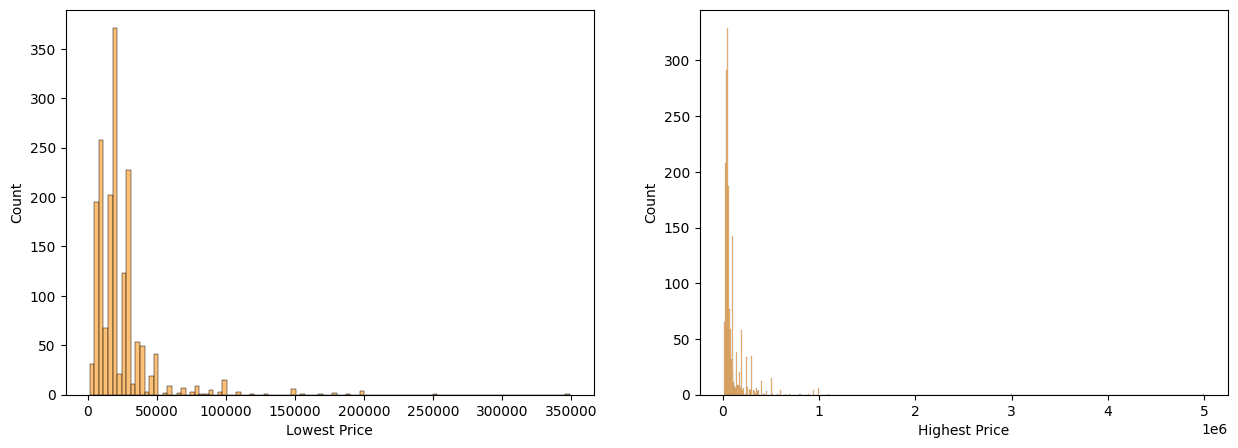

In [27]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize = (15,5) )  
sb.histplot(data = price, x = 'Lowest Price', ax= ax0, color = '#FBAB4A')
sb.histplot(data= price, x = 'Highest Price', ax = ax1, color = '#FBAB4A')
plt.show()

-> Use Median to replace invalid price values due to the significant right skew of the price distribution.

In [28]:
lowest_price_median = price['Lowest Price'].median()
highest_price_median = price['Highest Price'].median()

print("Median of Lowest Price:",lowest_price_median)
print("Median of Highest Price:",highest_price_median)

Median of Lowest Price: 20000.0
Median of Highest Price: 50000.0


Replace values less than 1.000 in Lowest Price with 20.000 and values less than 10.000 in Highest Price with 50.000.

In [29]:
lowest_price_error = restaurants[restaurants['Lowest Price'] < 1000]['Lowest Price'].unique()
highest_price_error = restaurants[restaurants['Highest Price'] < 1000]['Highest Price'].unique()

print(lowest_price_error, highest_price_error)

[ 0 15] [ 0 20]


In [30]:
restaurants['Lowest Price'] = restaurants['Lowest Price'].replace(lowest_price_error, 20000)
restaurants['Highest Price'] = restaurants['Highest Price'].replace(highest_price_error, 50000)

In [31]:
restaurants = restaurants.sort_values(by = 'RestaurantID', ascending= True)
restaurants.head()

,RestaurantID,Restaurant Name,Address,Time,Price,District,Time Open,Time Close,Lowest Price,Highest Price
0,1,Bún Bò Đất Thánh - Shop Online,"221/16 Đất Thánh, P. 6, Tân Bình, TP. HCM",00:00 - 23:59,15.000 - 50.000,Tân Bình,00:00,23:59,15000,50000
1,2,Bánh Mì Bảy Hổ - Phan Ngữ,"12 Phan Ngữ, P. Đa Kao, Quận 1, TP. HCM",06:00 - 20:00,10.000 - 30.000,Quận 1,06:00,20:00,10000,30000
2,3,Chân Gà Sốt Thái - Mr.Bon - Lê Bình,"100 Lê Bình, P. 4, Tân Bình, TP. HCM",06:00 - 23:00,10.000 - 100.000,Tân Bình,06:00,23:00,10000,100000
3,4,Yumi Fruit - Trái Cây Sạch & Đồ Ăn Vặt - Shop Online - Lê Thị Bạch Cát,"150/19 Lê Thị Bạch Cát, P. 11, Quận 11, TP. HCM",00:00 - 23:59,20.000 - 100.000,Quận 11,00:00,23:59,20000,100000
4,5,Sinh Tố Tao Đàn - The Sun Avenue,"The Sun Avenue, Block SAV.06 - 00.01, 28 Mai Chí Thọ, P. An Phú, Thành Phố Thủ Đức, TP. HCM",07:30 - 21:30,15.000 - 80.000,Thành Phố Thủ Đức,07:30,21:30,15000,80000


In [32]:
restaurants['RestaurantID'] = restaurants['RestaurantID'].astype('O')

In [33]:
restaurants = restaurants.drop(columns = {'Price'})
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3615 entries, 0 to 728
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RestaurantID     3615 non-null   object
 1   Restaurant Name  3615 non-null   object
 2   Address          3615 non-null   object
 3   Time             3615 non-null   object
 4   District         3615 non-null   object
 5   Time Open        3615 non-null   object
 6   Time Close       3615 non-null   object
 7   Lowest Price     3615 non-null   int32 
 8   Highest Price    3615 non-null   int32 
dtypes: int32(2), object(7)
memory usage: 254.2+ KB


-> Restaurant data has been cleaned.

### 3. Export Data Cleaned

In [34]:
restaurants.to_csv('data_cleaned/restaurant_cleaned.csv', index= False)

## **III. Review Dataset**

### 1. Read dataset and check summary about data

In [35]:
reviews = pd.read_csv('data_raw/review.csv')
reviews.head()

,Unnamed: 0,UserID,User,Review Time,Rating,Comment,RestaurantID
0,0,1,Cang Pham,"31/03/2022 12:02:37,",5.4,Good\n...Xem thêm,1
1,1,2,NaN,NaN,NaN,NaN,1
2,2,3,NaN,NaN,NaN,NaN,1
3,3,4,NaN,NaN,0.0,NaN,1
4,4,5,Yumi Fruit Trái Cây Sạch & Đồ Ăn Vặt,7/11/2020 12:51,10.0,"Trái cây tươi và ngon, sẽ ủng hộ tiếp",4


In [36]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15729 entries, 0 to 15728
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    15729 non-null  int64  
 1   UserID        15729 non-null  int64  
 2   User          15642 non-null  object 
 3   Review Time   15643 non-null  object 
 4   Rating        15673 non-null  float64
 5   Comment       15640 non-null  object 
 6   RestaurantID  15729 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 860.3+ KB


### 2. Data Cleaning

In [37]:
reviews = reviews.dropna(subset= 'Comment')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15640 entries, 0 to 15728
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    15640 non-null  int64  
 1   UserID        15640 non-null  int64  
 2   User          15639 non-null  object 
 3   Review Time   15640 non-null  object 
 4   Rating        15640 non-null  float64
 5   Comment       15640 non-null  object 
 6   RestaurantID  15640 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 977.5+ KB


In [38]:
reviews = reviews.dropna(subset= 'User')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15639 entries, 0 to 15728
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    15639 non-null  int64  
 1   UserID        15639 non-null  int64  
 2   User          15639 non-null  object 
 3   Review Time   15639 non-null  object 
 4   Rating        15639 non-null  float64
 5   Comment       15639 non-null  object 
 6   RestaurantID  15639 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 977.4+ KB


In [39]:
reviews = reviews.drop(columns = {'Unnamed: 0'})

In [40]:
reviews.head()

,UserID,User,Review Time,Rating,Comment,RestaurantID
0,1,Cang Pham,"31/03/2022 12:02:37,",5.4,Good\n...Xem thêm,1
4,5,Yumi Fruit Trái Cây Sạch & Đồ Ăn Vặt,7/11/2020 12:51,10.0,"Trái cây tươi và ngon, sẽ ủng hộ tiếp",4
5,6,Tri Nguyen,28/1/2021 15:59,9.8,Ngoooooooooooooooooooooooooooooooooooooon,5
6,7,Ânn Đoànn,2/1/2021 10:53,9.4,"Cái nước ép được thiết kế xinh ghê á, sống ảo xinh lắm nha :) ko gian chi nhánh này cũng xịn nữa nhìn ấm cúng. Cái bánh hướng dương này ngon nha 👍 có toà nhà hơi khó kiếm xíu",5
7,8,Mai Phuong Vy,2/1/2021 10:41,9.2,"Không gian quán yên tĩnh, tiếng nhạc du dương, thích hợp cho những cuộc họp mặt vào cuối tuần. Nước và bánh cookie ở đây ngon, trái cây tươi, còn có chương trình mua 2 tặng 1. Nhân viên take care khách hàng tổ. Must try nha mọi người",5


In [41]:
reviews['UserID'] = reviews['UserID'].astype('O')
reviews['RestaurantID'] = reviews['RestaurantID'].astype('O')

reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15639 entries, 0 to 15728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UserID        15639 non-null  object 
 1   User          15639 non-null  object 
 2   Review Time   15639 non-null  object 
 3   Rating        15639 non-null  float64
 4   Comment       15639 non-null  object 
 5   RestaurantID  15639 non-null  object 
dtypes: float64(1), object(5)
memory usage: 855.3+ KB


In [42]:
# Check duplicate data
reviews.duplicated().sum()

0

In [43]:
reviews['UserID'].duplicated().sum()

0

In [44]:
reviews['RestaurantID'].nunique()

818

In [45]:
reviews['Rating'].describe()

count    15639.000000
mean         7.703152
std          2.462973
min          0.000000
25%          6.600000
50%          8.400000
75%          9.800000
max         10.000000
Name: Rating, dtype: float64

In [46]:
rating = reviews.groupby('Rating')['User'].count().to_frame().reset_index()
rating.sort_values(by = 'Rating', ascending= False, inplace= True)
rating.head()

,Rating,User
46,10.0,3768
45,9.8,670
44,9.6,589
43,9.4,469
42,9.2,433


`Vietnamese data normalization`

In [47]:
reviews['Comment Tokenize'] = reviews['Comment'].apply(xt.stepByStep)

In [48]:
reviews.head()

,UserID,User,Review Time,Rating,Comment,RestaurantID,Comment Tokenize
0,1,Cang Pham,"31/03/2022 12:02:37,",5.4,Good\n...Xem thêm,1,god
4,5,Yumi Fruit Trái Cây Sạch & Đồ Ăn Vặt,7/11/2020 12:51,10.0,"Trái cây tươi và ngon, sẽ ủng hộ tiếp",4,trái tươi ngon ủng_hộ tiếp
5,6,Tri Nguyen,28/1/2021 15:59,9.8,Ngoooooooooooooooooooooooooooooooooooooon,5,ngon
6,7,Ânn Đoànn,2/1/2021 10:53,9.4,"Cái nước ép được thiết kế xinh ghê á, sống ảo xinh lắm nha :) ko gian chi nhánh này cũng xịn nữa nhìn ấm cúng. Cái bánh hướng dương này ngon nha 👍 có toà nhà hơi khó kiếm xíu",5,ép thiết_kế xinh ghê sống ảo xinh lắm ko gian chi_nhánh xịn ấm_cúng bánh hướng_dương ngon tòa hơi kiếm xíu
7,8,Mai Phuong Vy,2/1/2021 10:41,9.2,"Không gian quán yên tĩnh, tiếng nhạc du dương, thích hợp cho những cuộc họp mặt vào cuối tuần. Nước và bánh cookie ở đây ngon, trái cây tươi, còn có chương trình mua 2 tặng 1. Nhân viên take care khách hàng tổ. Must try nha mọi người",5,không_gian quán yên_tĩnh tiếng nhạc du_dương thích_hợp họp_mặt tuần bánh cokie ngon trái_cây tươi chương_trình mua 2 tặng 1 take care khách_hàng tổ must try


### 3. Export Data Cleaned

In [49]:
reviews.to_csv('data_cleaned/review_cleaned.csv', index= False)

## **IV. Export Data**

### 1. Create Label Column

In [50]:
data = pd.merge(restaurants, reviews, how='inner', left_on='RestaurantID', right_on='RestaurantID')

In [51]:
# data = data.drop(columns = {'Comment'})
# data.head()

`Comment:`  
- To avoid the lack of correlation between Rating and Comment (high Rating but negative Comment or vice versa), we will create a rule set consisting of two lists of words and phrases as follows:  
    - Positive: Positive words, expressing satisfaction, strengths of the restaurant, etc.  
    - Negative: Negative words, expressing dissatisfaction, weaknesses of the restaurant, etc.  
- Implementation:  
    - Use TfidfVectorizer with the following parameters:  
        - ngram_range: Get both words and phrases from 2 to 3 words.
        - min_df: Minimum occurrence frequency of 2%.  
        - max_df: Maximum occurrence frequency of 90%.
    - Then select additional characteristic keywords for each Positive and Negative group.  
- Finally, assign labels to Comments based on the above rule set.

In [52]:
# Get Comment Tokenize column
text = data[['Comment Tokenize']]

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Build Parameters
tfidf = TfidfVectorizer(
    ngram_range= (1,3),
    min_df = 0.02,
    max_df = 0.9
)

# Fit the vectorizer
tfidf.fit(text['Comment Tokenize'])

# Transform
text = tfidf.transform(text['Comment Tokenize'])

# Create df_text
df_text = pd.DataFrame(text.toarray(), columns= tfidf.get_feature_names_out())

# Show some random rows
df_text.sample(5)

,10,20,30,35,50,bàn,bánh,bánh_mì,bánh_tráng,béo,...,đồ,đồ ngon,đồ_uống,đồ_ăn,đợi,ấn_tượng,ổn,ớt,ủng_hộ,ủng_hộ quán
8171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
10938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
7795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.166705,...,0.128772,0.0,0.0,0.188641,0.0,0.0,0.0,0.0,0.000000,0.0
5850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.37989,0.0,0.000000,...,0.132189,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.157257,0.0


In [53]:
# Create a DataFrame showing the occurrence count of each keyword in the DataFrame df_text.
lst_value = []
lst_name = []
for col in df_text.columns:
    value = df_text[df_text[col]>0][col].value_counts().sum()
    lst_value.append(value)
    lst_name.append(col)

word_important = pd.DataFrame({'KeyWord' : lst_name, 'Count' : lst_value})
word_important.sort_values(by = 'Count', ascending= False, inplace= True)

In [54]:
word_important

,KeyWord,Count
92,ngon,9644
114,quán,6807
66,không,4738
86,món,3685
79,lắm,3138
45,giá,2982
56,hơi,2504
137,thử,2494
132,thơm,2435
162,uống,2428


In [55]:
# "Create a list of keywords belonging to the Positive group.
positive_words = [
"thích", "tốt", "xuất sắc", "tuyệt vời", "tuyệt hảo", "đẹp", "ổn", "ngon",
"hài lòng", "ưng ý", "hoàn hảo", "chất lượng", "thú vị", "nhanh",
"tiện lợi", "dễ sử dụng", "hiệu quả", "ấn tượng",
"nổi bật", "tận hưởng", "tốn ít thời gian", "thân thiện", "hấp dẫn",
"gợi cảm", "tươi mới", "lạ mắt", "cao cấp", "độc đáo",
"hợp khẩu vị", "rất tốt", "rất thích", "tận tâm", "đáng tin cậy", "đẳng cấp",
"hấp dẫn", "an tâm", "không thể cưỡng lại", "thỏa mãn", "thúc đẩy",
"cảm động", "phục vụ tốt", "làm hài lòng", "gây ấn tượng", "nổi trội",
"sáng tạo", "quý báu", "phù hợp", "tận tâm",
"hiếm có", "cải thiện", "hoà nhã", "chăm chỉ", "cẩn thận",
"vui vẻ", "sáng sủa", "hào hứng", "đam mê", "vừa vặn", "đáng tiền", "nhiệt tình", "best", "good", "nghiện", "nhanh", "ngon nhất", "quá ngon", "quá tuyệt", "đúng vị", 
"điểm cộng", "thức ăn ngon", "khá ngon", "niềm nở", "rất thích", "đặc biệt", "không bị", "tươi ngon", "thơm", "chất lượng", "rộng rãi", "tặng", "sạch sẽ", "món ngon", "ăn rất ngon", "giá rẻ",
"thích nhất", "đồ ăn ngon", "phục vụ nhanh", "giá hợp", "đa dạng", "ngon giá", "phục vụ nhanh", "nhanh nhẹn", "thân thiện", "thơm", "ăn ngon", "cộng", "ủng_hộ quán", "ủng_hộ", "hấp_dẫn", "ấn_tượng", "thoải_mái",
"quán ngon", "ủng_hộ", "khen", "dài_dài", "tin_tưởng"
]
len(positive_words)

106

In [56]:
# "Create a list of keywords belonging to the Negative group.
negative_words = [
"kém", "tệ", "đau", "xấu", "không", "dở", "ức",
"buồn", "rối", "thô", "lâu", "chán"
"tối", "chán", "ít", "mờ", "mỏng",
"lỏng lẻo", "khó", "cùi", "yếu",
"kém chất lượng", "không thích", "không thú vị", "không ổn",
"không hợp", "không đáng tin cậy", "không chuyên nghiệp",
"không phản hồi", "không an toàn", "không phù hợp", "không thân thiện", "không linh hoạt", "không đáng giá",
"không ấn tượng", "không tốt", "chậm", "khó khăn", "phức tạp",
"khó hiểu", "khó chịu", "gây khó dễ", "rườm rà", "khó truy cập",
"thất bại", "tồi tệ", "khó xử", "không thể chấp nhận", "tồi tệ","không rõ ràng",
"không chắc chắn", "rối rắm", "không tiện lợi", "không đáng tiền", "chưa đẹp", "không đẹp", "bad", "thất vọng", "không ngon", "không hợp",
"hôi", "trộm cướp", "không_ngon", "không_thích", "không_ổn", "không_hợp", "lần cuối", "cuối cùng", "quá tệ", "quá dở", "quá mắc", "cau có", "không đáng", "chả đáng",
"điểm trừ", "thức ăn tệ", "đồ ăn tệ", "đợi lâu", "nhạt nhẽo", "không thoải mái", "không đặc sắc", "tanh", "giá hơi mắc", "giá hơi đắt", "không chất lượng", "chê", "trừ",
"giá hơi", "chậm", "chậm chạm", "lâu", "quá lâu", "nhạt", "chờ", "ăn hơi", "khủng khiếp", "đợi", "nhạt", "thất_vọng", "bực_mình"
]
len(negative_words)

99

In [57]:
# Create a function to count the corresponding number of keywords for each group from a Comment.
def find_words(document, list_of_words):
    document_lower = document.lower()
    word_count = 0
    word_list = []
    for word in list_of_words:
        if word in document_lower:
            # print(word)
            word_count += document_lower.count(word)
            # word_list.append(word)
    return word_count

In [58]:
# Apply the find_word function to the Content feature to create two new features: Positive Count and Negative Count.
data['Positive Count'] = data['Comment Tokenize'].apply(lambda x: find_words(x, positive_words))
data['Negative Count'] = data['Comment Tokenize'].apply(lambda x: find_words(x, negative_words))

In [59]:
data.head()

,RestaurantID,Restaurant Name,Address,Time,District,Time Open,Time Close,Lowest Price,Highest Price,UserID,User,Review Time,Rating,Comment,Comment Tokenize,Positive Count,Negative Count
0,1,Bún Bò Đất Thánh - Shop Online,"221/16 Đất Thánh, P. 6, Tân Bình, TP. HCM",00:00 - 23:59,Tân Bình,00:00,23:59,15000,50000,1,Cang Pham,"31/03/2022 12:02:37,",5.4,Good\n...Xem thêm,god,0,0
1,4,Yumi Fruit - Trái Cây Sạch & Đồ Ăn Vặt - Shop Online - Lê Thị Bạch Cát,"150/19 Lê Thị Bạch Cát, P. 11, Quận 11, TP. HCM",00:00 - 23:59,Quận 11,00:00,23:59,20000,100000,5,Yumi Fruit Trái Cây Sạch & Đồ Ăn Vặt,7/11/2020 12:51,10.0,"Trái cây tươi và ngon, sẽ ủng hộ tiếp",trái tươi ngon ủng_hộ tiếp,4,0
2,5,Sinh Tố Tao Đàn - The Sun Avenue,"The Sun Avenue, Block SAV.06 - 00.01, 28 Mai Chí Thọ, P. An Phú, Thành Phố Thủ Đức, TP. HCM",07:30 - 21:30,Thành Phố Thủ Đức,07:30,21:30,15000,80000,6,Tri Nguyen,28/1/2021 15:59,9.8,Ngoooooooooooooooooooooooooooooooooooooon,ngon,1,0
3,5,Sinh Tố Tao Đàn - The Sun Avenue,"The Sun Avenue, Block SAV.06 - 00.01, 28 Mai Chí Thọ, P. An Phú, Thành Phố Thủ Đức, TP. HCM",07:30 - 21:30,Thành Phố Thủ Đức,07:30,21:30,15000,80000,7,Ânn Đoànn,2/1/2021 10:53,9.4,"Cái nước ép được thiết kế xinh ghê á, sống ảo xinh lắm nha :) ko gian chi nhánh này cũng xịn nữa nhìn ấm cúng. Cái bánh hướng dương này ngon nha 👍 có toà nhà hơi khó kiếm xíu",ép thiết_kế xinh ghê sống ảo xinh lắm ko gian chi_nhánh xịn ấm_cúng bánh hướng_dương ngon tòa hơi kiếm xíu,1,0
4,5,Sinh Tố Tao Đàn - The Sun Avenue,"The Sun Avenue, Block SAV.06 - 00.01, 28 Mai Chí Thọ, P. An Phú, Thành Phố Thủ Đức, TP. HCM",07:30 - 21:30,Thành Phố Thủ Đức,07:30,21:30,15000,80000,8,Mai Phuong Vy,2/1/2021 10:41,9.2,"Không gian quán yên tĩnh, tiếng nhạc du dương, thích hợp cho những cuộc họp mặt vào cuối tuần. Nước và bánh cookie ở đây ngon, trái cây tươi, còn có chương trình mua 2 tặng 1. Nhân viên take care khách hàng tổ. Must try nha mọi người",không_gian quán yên_tĩnh tiếng nhạc du_dương thích_hợp họp_mặt tuần bánh cokie ngon trái_cây tươi chương_trình mua 2 tặng 1 take care khách_hàng tổ must try,3,1


`Comment:`  
- Create a Label column based on the following rules:  
    - Positive Count - Negative Count > 0   -> Positive.  
    - Positive Count - Negative Count < 0  -> Negative.
    - Positive Count - Negative Count = 0   -> Neutral.

In [60]:
# Create Label column
data['Label'] = data.apply(lambda row: 'Positive' if row['Positive Count'] - row['Negative Count'] > 0 else ('Negative' if row['Positive Count'] - row['Negative Count'] < 0 else 'Neutral'), axis=1)

In [61]:
data['Label'].value_counts()

Positive    9541
Negative    3388
Neutral     2710
Name: Label, dtype: int64

- The dataset contains more positive reviews, leading to data imbalance after labeling.

-> It is proposed that data augmentation techniques such as Over Sampling or Under Sampling be employed in the model building step.

In [62]:
data.sample(3)

,RestaurantID,Restaurant Name,Address,Time,District,Time Open,Time Close,Lowest Price,Highest Price,UserID,User,Review Time,Rating,Comment,Comment Tokenize,Positive Count,Negative Count,Label
1283,115,Bánh Mì Huynh Hoa - Bánh Mì Pate,"26 Lê Thị Riêng, P. Bến Thành, Quận 1, TP. HCM",06:00 - 22:00,Quận 1,06:00,22:00,38000,38000,1290,Hoàng Vũ Cao,11/12/2018 21:02,6.6,"Bánh mì hồi trước ngon lắm. Gần đây mình ăn có vẻ hơi mặn, mặn lắm luôn chắc do xì dầu nhiều quá . \nChất lương thịt pate thì cũng như trước.",bánh_mì hồi ngon lắm hơi mặn mặn lắm xì_dầu chất lương thịt pate,1,0,Positive
12138,2686,Ding Tea - Cộng Hòa,"71/9 Cộng Hòa, P. 4, Tân Bình, TP. HCM",08:00 - 17:30,Tân Bình,08:00,17:30,25000,50000,12212,Kim Ngân,11/1/2018 18:37,9.2,"• Vị trí dễ tìm\n• Nhân viên phục vụ khá tốt, còn được phiếu tích điểm nữa\n• Mình uống trà sữa đào với topping là trân châu trắng, vị đào ở đây rất ngon, còn trân châu trắng thì dai dai\n• Có ghế cao ghế thấp, ở khu ghế cao có góc đựng sách/ tiểu thuyết cho bạn nào muốn đọc",phục_vụ tốt phiếu tích uống trà sữa đào toping trân_châu trắng vị đào ngon trân_châu trắng dai dai ghế ghế khu ghế góc đựng sách tiểu_thuyết đọc,2,0,Positive
13991,3228,Papas' Chicken - Gà Rán Hàn Quốc - Nguyễn Thiện Thuật,"145/17 Nguyễn Thiện Thuật, P. 1, Quận 3, TP. HCM",09:30 - 23:59,Quận 3,09:30,23:59,100000,250000,14071,Ngoc Nguyen,21/4/2021 23:31,7.0,Gà rán sốt cay\nGà rán sốt gia vị\nCơm kim chi\nMì tương đen\nPepsi (PET),gà rán sốt cay gà rán sốt gia_vị cơm kim chi mì tương đen pepsi pet,0,0,Neutral


In [63]:
# Drop unnecessary column
data = data.drop(['Positive Count', 'Negative Count'], axis= 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15639 entries, 0 to 15638
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RestaurantID      15639 non-null  object 
 1   Restaurant Name   15639 non-null  object 
 2   Address           15639 non-null  object 
 3   Time              15639 non-null  object 
 4   District          15639 non-null  object 
 5   Time Open         15639 non-null  object 
 6   Time Close        15639 non-null  object 
 7   Lowest Price      15639 non-null  int32  
 8   Highest Price     15639 non-null  int32  
 9   UserID            15639 non-null  object 
 10  User              15639 non-null  object 
 11  Review Time       15639 non-null  object 
 12  Rating            15639 non-null  float64
 13  Comment           15639 non-null  object 
 14  Comment Tokenize  15639 non-null  object 
 15  Label             15639 non-null  object 
dtypes: float64(1), int32(2), object(13)
memo

(-0.5, 399.5, 299.5, -0.5)

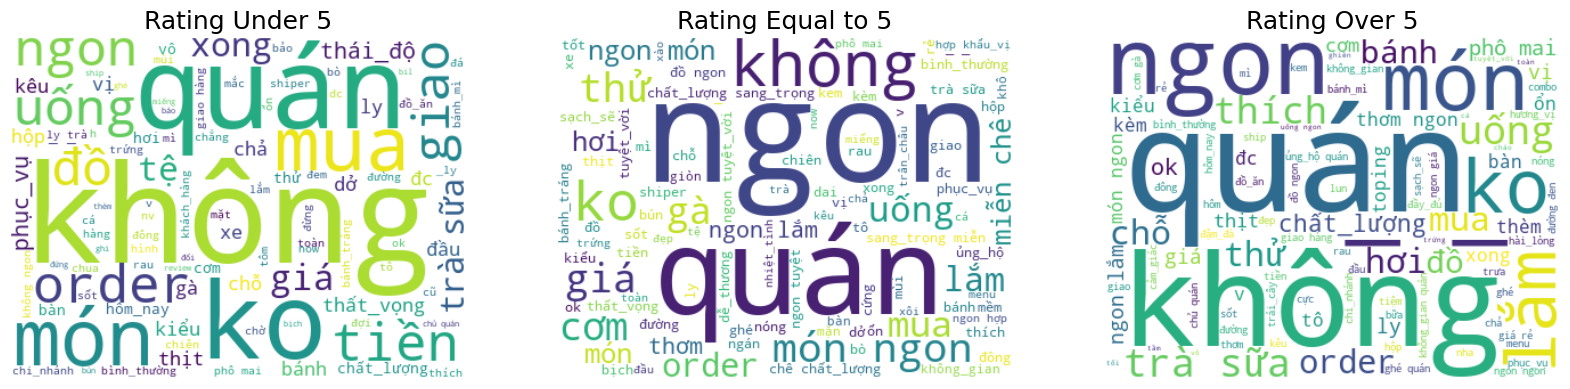

In [64]:
# Create some wordcloud by Rating
fig, axes = plt.subplots(1, 3, figsize=(20,12))
text_rating1 = ' '.join(data[data['Rating'] < 5]['Comment Tokenize'])
wordcloud_rating1 = WordCloud(background_color='white', width=400, height=300, max_words=100).generate(text_rating1)
axes[0].imshow(wordcloud_rating1, interpolation="bilinear")
axes[0].set_title("Rating Under 5", fontsize = 18)
axes[0].axis('off')

text_rating2 = ' '.join(data[data['Rating'] == 5]['Comment Tokenize'])
wordcloud_rating2 = WordCloud(background_color='white', width=400, height=300, max_words=100).generate(text_rating2)
axes[1].imshow(wordcloud_rating2, interpolation="bilinear")
axes[1].set_title("Rating Equal to 5", fontsize = 18)
axes[1].axis('off')

text_rating3 = ' '.join(data[data['Rating'] > 5]['Comment Tokenize'])
wordcloud_rating3 = WordCloud(background_color='white', width=400, height=300, max_words=100).generate(text_rating3)
axes[2].imshow(wordcloud_rating3, interpolation="bilinear")
axes[2].set_title("Rating Over 5", fontsize = 18)
axes[2].axis('off')



`Comment:`  
- Based on the Rating data, we can observe three groups that are not clearly distinguished from each other.  
- The frequency of adjectives appearing is almost evenly distributed among the three groups.

(-0.5, 399.5, 299.5, -0.5)

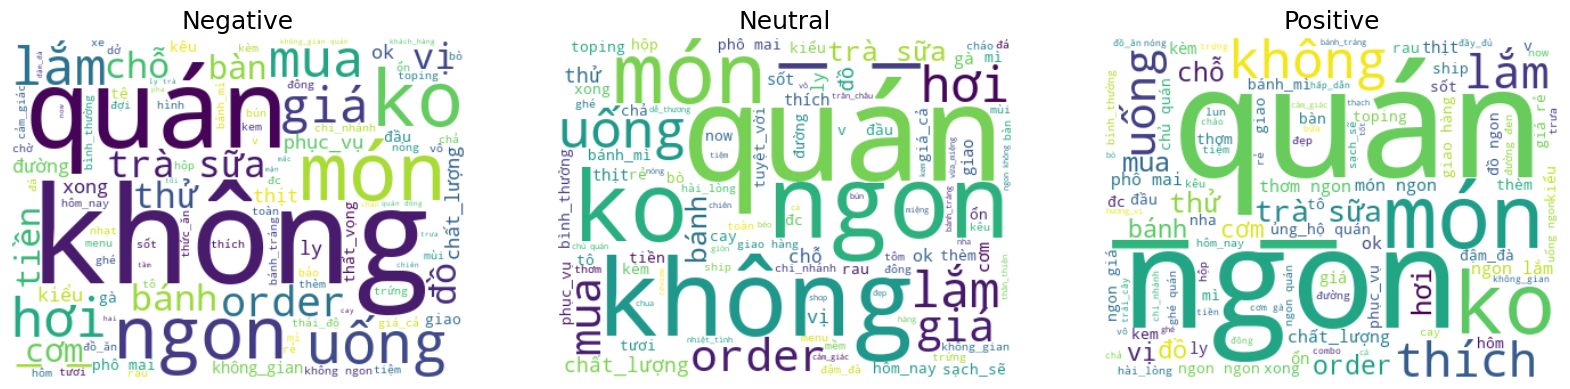

In [65]:
# Create some wordcloud by Label
fig, axes = plt.subplots(1, 3, figsize=(20,12))
text_label1 = ' '.join(data[data['Label'] == 'Negative']['Comment Tokenize'])
wordcloud_label1 = WordCloud(background_color='white', width=400, height=300, max_words=100).generate(text_label1)
axes[0].imshow(wordcloud_label1, interpolation="bilinear")
axes[0].set_title("Negative", fontsize = 18)
axes[0].axis('off')

text_label2 = ' '.join(data[data['Label'] == 'Neutral']['Comment Tokenize'])
wordcloud_label2 = WordCloud(background_color='white', width=400, height=300, max_words=100).generate(text_label2)
axes[1].imshow(wordcloud_label2, interpolation="bilinear")
axes[1].set_title("Neutral", fontsize = 18)
axes[1].axis('off')

text_label3 = ' '.join(data[data['Label'] == 'Positive']['Comment Tokenize'])
wordcloud_label3 = WordCloud(background_color='white', width=400, height=300, max_words=100).generate(text_label3)
axes[2].imshow(wordcloud_label3, interpolation="bilinear")
axes[2].set_title("Positive", fontsize = 18)
axes[2].axis('off')


`Comment:`  
- Meanwhile, when using the data grouped by Label, the three groups are relatively clearly distinguished from each other.  
    - Negative Group: Negative words like "không," "tệ," "bình thường," "chờ," etc. appear more prominently.  
    - Neutral Group: It has neutral characteristics, both positive and negative, with words like "ngon," "thích," "ok," "bình thường," etc.  
    - Positive Group: These are adjectives that express a very high level of positivity, such as "thích," "quán ngon," "món ngon," "ngon lắm," "ủng hộ quán," etc.  
- Although it has not yet been optimized, as there are still some adjectives mixed in all three groups due to reasons such as data imbalance and limited data, this can still be considered a relatively positive result for this dataset, which we can use for building the model in the next step.

### 2. Export Data to Analysis

In [66]:
data.to_csv('data_cleaned/data_analysis.csv', index= False)